In [105]:
import pandas as pd
import numpy as np
Credit= pd.read_csv("Credit_card_dataset.csv")
Credit

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000
...,...,...,...,...,...,...
8945,C19186,1.000000,291.12,325.594462,1000.0,0.000000
8946,C19187,1.000000,300.00,275.861322,1000.0,0.000000
8947,C19188,0.833333,144.40,81.270775,1000.0,0.000000
8948,C19189,0.833333,0.00,52.549959,500.0,36.558778


### Effectuez la phase d'exploration de base des données

In [106]:
Credit.head(10)

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000
5,C10006,1.000000,1333.28,1400.057770,1800.0,0.000000
6,C10007,1.000000,7091.01,6354.314328,13500.0,0.000000
7,C10008,1.000000,436.20,679.065082,2300.0,0.000000
8,C10009,1.000000,861.49,688.278568,7000.0,0.000000
9,C10010,0.545455,1281.60,1164.770591,11000.0,0.000000


In [107]:
Credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [108]:
Credit.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


## Effectuer les étapes de préparation des données nécessaires


In [109]:
Credit.isna().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [110]:
import plotly.express as px
fig = px.histogram(Credit, x='PURCHASES', nbins=15)
fig.show()

In [113]:
fig = px.bar(Credit, x="PAYMENTS", y="PURCHASES", color="PURCHASES", height=300)
fig.show()

In [112]:
Credit.dropna(axis=0, how='any', inplace=True) 

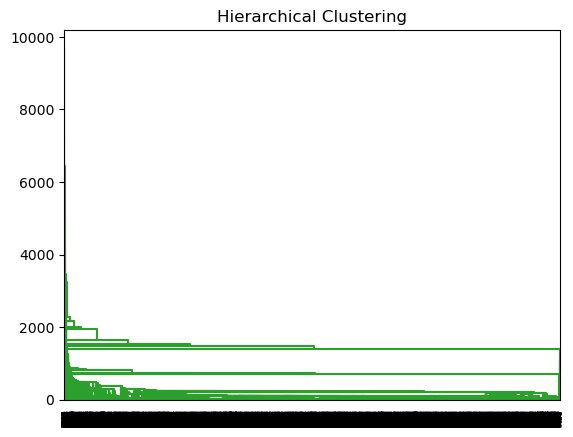

In [100]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

columns = ['PURCHASES',  'CREDIT_LIMIT']
x = Credit[columns].values

# Effectuer le clustering hiérarchique
linkage_matrix = linkage(x, "single")

# Tracer le dendrogramme
dendrogram(linkage_matrix, truncate_mode='none')

plt.title("Hierarchical Clustering")
plt.show()


C:\Users\Murielle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Murielle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



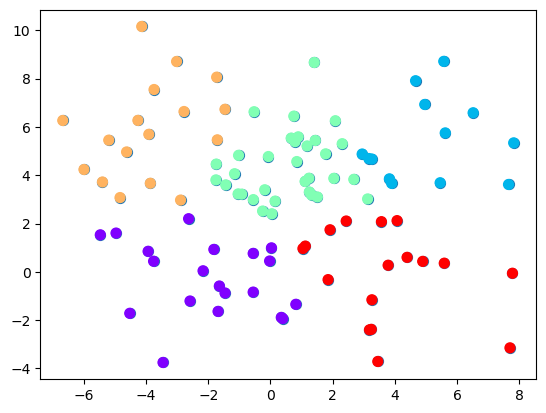

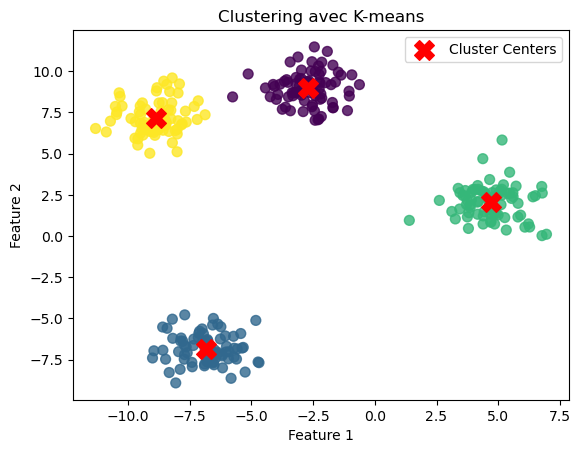

In [101]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=100, centers=3, random_state=0, cluster_std=3)

plt.scatter(x[:, 0], x[:, 1], s=50)

model = KMeans(5)
model.fit(x)
y_kmeans = model.predict(x)

plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='rainbow')
plt.show()
# Tracez les points de données colorés par cluster
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)

# Tracez les centres des clusters
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

plt.title('Clustering avec K-means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

C:\Users\Murielle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Murielle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Murielle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Murielle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Murielle\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The d

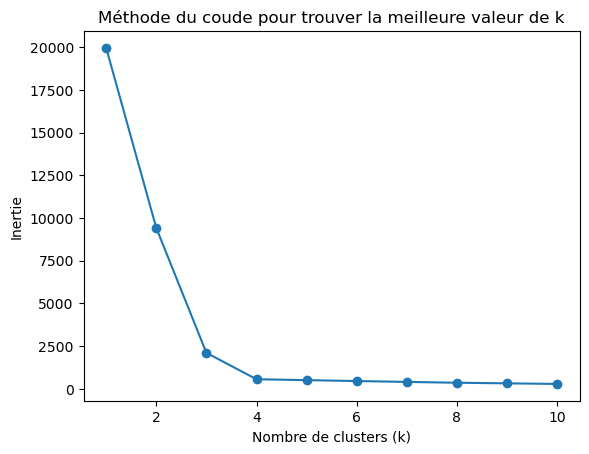

In [102]:
inertia_values = []

# Testez différentes valeurs de k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Tracez la courbe du coude
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Méthode du coude pour trouver la meilleure valeur de k')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.show()
